# <p style="text-align:center">Parcours des protons dans la matières</p> #

Présenté par l'équipe 9: **Mathieu Dumais**, **Antoine Rousseau** et **Gabriel Lapointe**.

Présenté à **Philippe Després**.

Date: **19 février 2021**.


## Question 1 ###

3.385161894888597e+29
5.906570630843504e+29


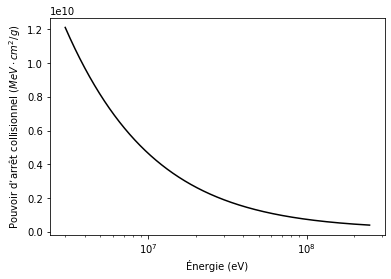

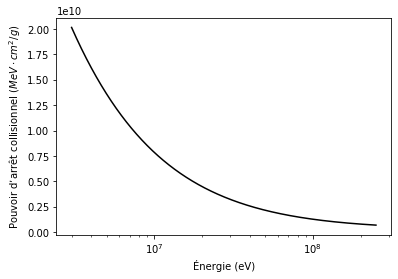

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Definition of known costants
avogadro = 6.022e23 #particle/mol
c = 299792458 #m/s
me = 9.1094E-31*6.242e18 #eV
mp = 1.6727E-27*6.242e18 #eV 
re = 2.8179403227e-15 #m

#Definition of materials (water and compact bone)

#Water
list_atom_H20 = [1, 8] #atomic number of atoms in H20
list_fraction_H20 = [0.11894, 0.888194] #massic fraction of constituents
list_molar_mass_H20_g = [1.0079, 15.999] #g/mol (molar mass in g)
list_molar_mass_H20 = [x / 1000 for x in list_molar_mass_H20_g] #kg/mol (in kg)
rho_water = 1000 #kg/m^3 (density)
I_H20 = 75 #eV 

#Compact bone
list_atom_bone = [1, 6, 7, 8, 12, 15, 16, 20]   
list_fraction_bone = [0.063984, 0.278, 0.027, 0.410016, 0.002, 0.07, 0.002, 0.147]
list_molar_mass_bone_g = [1.007, 12.01, 14.007, 15.999, 24.305, 30.974, 32.06, 40.078] #g/mol
list_molar_mass_bone = [x / 1000 for x in list_molar_mass_bone_g] #kg/mol
rho_bone = 1850 #kg/m^3
I_bone = 91.9 # 

#calculation of electron density of materials
def calc_ne(list_atom_no, list_fraction, list_molar_mass, rho):
    i = 0 
    ne = 0
    for atom_no in list_atom_no:
        nb_electron = atom_no*(list_fraction[i]/list_molar_mass[i])*avogadro
        ne += rho*nb_electron
        i += 1
    return ne

#Calculation of lorentz factor and stopping power of proton in materials
def f(T, ne, I):
    gamma = T/(mp*c**2) + 1
    beta = np.sqrt(1- 1/gamma**2)
    Te_max = (2 * me * c**2 * (gamma**2 - 1)) / (1 + 2 * gamma * (me / mp) + (me / mp)**2)
    return 2*np.pi*(re**2)*me*(c**2)*ne*(1/(beta**2))*(np.log(2*me*(c**2)*(beta**2)*(gamma**2)*Te_max/(I**2))-2*(beta**2))

#Plotting
def plot_Scol(ne, I, figname):
    T = np.linspace(3e6,250e6, 1000000)
    Scol = f(T, ne, I)
    
    g = plt.figure()
    plt.plot(T, Scol, "k")
    plt.xscale("log")
    #plt.yscale("log")
    plt.xlabel("Énergie (eV)")
    plt.ylabel(r"Pouvoir d’arrêt collisionnel ($MeV \cdot cm^2 / g$)")
    plt.show()
    g.savefig(figname, dpi = 600, bbox_inches = "tight")

#Calling the electron density function
ne_H20 = calc_ne(list_atom_H20, list_fraction_H20, list_molar_mass_H20, rho_water)
ne_bone = calc_ne(list_atom_bone, list_fraction_bone, list_molar_mass_bone, rho_bone)
    
#Printing electron density
print(ne_H20)
print(ne_bone)  



#Calling the plotting function
plot_Scol(ne_H20, I_H20, "Scol_H20.png")
plot_Scol(ne_bone, I_bone, "Scol_bone.png")

plt.show()

# Portée des protons dans la matière
## Question 2 ###

Nous savons que la porté par **CDSA** est en $g/cm^2$ (selon le site du **NIST**). Il nous faut donc prouver que l'équation de $R_{CDSA}$ revient donc à l'unité ci-haut:

\begin{equation}
    R_{CDSA}=\int_0^{T_i}\frac{dT'}{\frac{S_{col}}{\rho}}
\end{equation}
\begin{equation}
    R_{CDSA}=\rho\int_0^{T_i}\frac{dT'}{S_{col}}
\end{equation}

Nous savons que $\rho$ est la densité ($g/cm^3$), $T'$ l'énergie de tranféré à un électron (MeV) et $S_{col}$ est l'énergie perdu par le proton sur la distance qu'il parcours (MeV/cm). L'intégrale n'a pas d'impact sur les unités des variables.

\begin{equation}
    R_{CDSA}=g/cm^3\cdot\frac{MeV}{MeV/cm}=g/cm^2
\end{equation}

CQFD

## Question 3 ###

L'arrêt collisionnel aux énergies est une bonne approximation de l'arrêt collisionnel total tout parce que les autres énergies en vigueur dans la réaction ont beaucoup moins d'impact que l'énergie électronique. D'un côté, le pouvoir d'arrêt nucléaire est négligé parce que, puisque que celui-ci consiste à l'énergie des collisions élastiques entre le proton et les noyaux de la matière, les énergies ont beaucoup moins de porté sur toutes la matière, car les noyaux sont beaucoup moins présents que les électrons et donc l'énergie de ces interactions prend moins d'espace. Cependant, le pouvoir d'arrêt nucléaire s'accroit lorsque la masse de l'ion est plus importante (parce que les noyaux sont plus volumineux) et lorsque l'énergie cinétique du proton diminue. Prenant le graphique ***PSTAR: Stopping Power and Range Tables for Protons*** pour l'eau liquide sur le site web du **NIST**, on peut voir qu’à basse énergie, le pouvoir d'arrêt nucléaire donne un léger impact sur le pouvoir d'arrêt total, mais aux environ du 3MeV utilisé en protonthérapie, le pouvoir d'arrêt nucléaire est plus de 100 plus petits que le pouvoir d'arrêt électronique et continu à descendre. Le pouvoir d'arrêt nucléaire est donc négligeable dans le cadre de la protonthérapie. D'autre part, les pertes radiatives sont négligées parce que celles-ci sont causées par le rayonnement électromagnétique des noyaux qui, encore une fois, sont beaucoup moins nombreux et prennent beaucoup moins d'espace que les électrons dans la matière.

## Question 4 ###

La méthode numérique est nécessaire dans ce contexte surtout pour gagner beaucoup de temps dans les calculs de la portée des protons dans la matière. En effet, l'intégrale contenue dans le calcul de la porté ($R_{CDSA}=\int_0^{T_i}\frac{dT'}{\frac{S_{col}}{\rho}}$) est très longue à calculé analytiquement, surtout si l'on désire des données d'une grande précision, ce qui est le cas dans un contexte médical. En effet, faire l'intégral simplement à l'aide de la méthode des trapèzes procure une erreur sur la valeur de l'ordre de $10^{-16}$ en calculant l'aire de milliers de trapèzes en à peine quelques secondes.

## Question 5 ###

In [2]:
import numpy as np
from scipy.stats import moyal
import matplotlib.pyplot as plt
from scipy import integrate
import timeit

Ti = 150e6
rho_H2O = 1000
rho_bone = 1850
I_H2O = 75 #eV
I_bone = 91.9 #eV
#I_H2O = I_bone
c = 299792458
me = 9.1094E-31*6.242e18 #eV
mp = 1.6727E-27*6.242e18 #eV 
re = 2.8179403227e-15 #m

ne_H2O = 3.385161894888597e+29
ne_bone = 5.906570630843504e+29
#ne_H2O = ne_bone

energy_list = []

for i in range(10000):
    energy_list += [moyal.rvs(150, 4)]
    

def f(T, ne, I, rho):
    gamma = T/(mp*c**2) + 1
    beta = np.sqrt(1- 1/gamma**2)
    Te_max = (2 * me * c**2 * (gamma**2 - 1)) / (1 + 2 * gamma * (me / mp) + (me / mp)**2)
    Scol = 2*np.pi*(re**2)*me*(c**2)*ne*(1/(beta**2))*(np.log(2*me*(c**2)*(beta**2)*(gamma**2)*Te_max/(I**2))-2*(beta**2))
        
    return rho/Scol

def test_error(Ri, Ri_old, m, target, found):
    err = (1/((4**m)-1))*np.abs(Ri-Ri_old)
    if found == False:
        if err <= Ri*target:
            found = True
            
    return [err, found]

def trapeze(N, a, b, ne, I, rho): 
    h = (b-a)/N
    s = 0.5*f(a, ne, I, rho) + 0.5*f(b, ne, I, rho)
    
    for k in range(1,N):
        s += f(a+k*h, ne, I, rho)

    theo_error = (1/12)*(h**2)*(f_prime(a, ne, I) - f_prime(b, ne, I))
        
    return h*s, theo_error
    
def simpson(N, a, b, ne, I, rho):
    h = (b-a)/N
    s1 = 0.0
    for k in range(1,N,2):
        s1 += f(a+k*h, ne, I, rho)
    s2 = 0.0
    for k in range(2,N,2):
        s2 += f(a+k*h, ne, I, rho)
        
    theo_error = 0 #could be implemented in the future
        
    return (f(a, ne, I, rho)+f(b, ne, I, rho)+4.0*s1+2.0*s2)*h/3.0, theo_error

def algo(Ti, material, N_i, target, int_type):
    
    if material == "water":
        ne = ne_H2O
        I = I_H2O
        rho = rho_H2O
        
    elif material == "bone":
        ne = ne_bone
        I = I_bone
        rho = rho_bone
        
    if int_type == "trapeze":
        integral, theo_error = trapeze(N_i, 3e6, Ti, ne, I, rho)
        R = [integral]
        
    elif int_type == "simpson" :
        integral, theo_error = simpson(N_i, 3e6, Ti, ne, I, rho)
        R = [integral]
        
    i = 1
    found = False
    
    while found == False:
        N_i = N_i * 2
        
        if int_type == "trapeze":
            integral, theo_error = trapeze(N_i, 3e6, Ti, ne, I, rho)
            R += [integral]
            
        elif int_type == "simpson" :
            integral, theo_error = simpson(N_i, 3e6, Ti, ne, I, rho)
            R += [integral]
        
        Ri = R[-1]
        Ri_old = R[-1-i]
        error = test_error(Ri, Ri_old, 1, target, found) #calculating error
        found = error[1] #confirming if error < target
        
        
        #loop for calculation of Ri,m integrals (m != 1)
        for m in range(2,i+2):
            
            if found == False:
                Ri = R[-1] #integral Ri,m
                Ri_old = R[-1-i] #integral Ri-1,m
                
                error = test_error(Ri, Ri_old, m, target, found) #calculating error
                found = error[1] #confirming if error < target

                R += [Ri + error[0]] # calculating integral Ri,m+1
        
        i += 1    
    
    return Ri, error[0], theo_error

def time_algorithm(int_type, target):
    protons = []
    start_time = timeit.default_timer()
    
    n = 0
    for i in energy_list:
        if int_type == "quad":
            integral, error = integrate.quad(lambda x :f(x, ne_H2O, I_H2O, rho_H2O), 3e6, i*1e6)
            protons += [integral]
        else:
            integral, error, theo_error = algo(i*1e6, "water", 1, target, int_type)
            protons += [integral]
        
        end_time = timeit.default_timer()
        n += 1
            
    return protons, (end_time-start_time)
    
scope_list = []

# Calculating the scope of proton in bones and water with both integration methods
for i in ["trapeze", "simpson"]:
    for j in ["water", "bone"]:
        scope, error, theo_error = algo(Ti, j, 1, 1e-16, i)
        print(i + ", " +  j + " :")
        print("result = " + str(scope) + " cm")
        print("error = " + str(error))
        print("theo_error = " + str(theo_error) + "\n")

trapeze, water :
result = 155.52864634816535 cm
error = 1.1599924956053916e-14
theo_error = 1.2518758418224675e-06

trapeze, bone :
result = 169.39813997699036 cm
error = 1.280285956632944e-14
theo_error = 7.085064103884864e-07

simpson, water :
result = 155.52864660761227 cm
error = 6.0330758474393865e-15
theo_error = 0

simpson, bone :
result = 169.3981402633446 cm
error = 6.5576675688861485e-15
theo_error = 0



## Question 6 ###

\begin{equation}
    \Rightarrow S_{col}(\gamma) = 2 \pi r_{e}^2 m_e c^2 n_e \frac{1}{\beta^2} \left[\ln \left(\frac{2m_e c^2 \beta^2 \gamma^2 T_e^{max}}{I^2}\right) -2\beta^2 \right]
\end{equation}
\begin{equation}
    \Rightarrow T_e^{max}= \frac{a(\gamma^2-1)}{b+d\gamma}
\end{equation}
\begin{equation}
    \Rightarrow a = 2m_e
\end{equation}
\begin{equation}
    \Rightarrow b = 1+\left(\frac{m_e}{m_p}\right)^2
\end{equation}
\begin{equation}
    \Rightarrow d=\frac{m_e}{m_p}
\end{equation}
\begin{equation}
    \Rightarrow \beta=\sqrt{\left(1- 1/\gamma^2\right)}
\end{equation}
\begin{equation}
    \Rightarrow U = 2 \pi r_{e}^2 m_e c^2 n_e
\end{equation}
\begin{equation}
    \Rightarrow k=\frac{a^2}{I^2}
\end{equation}
\begin{equation}
    \Rightarrow \gamma=\frac{T}{m_pc^2}+1
\end{equation}
\begin{equation}
    \Rightarrow \frac{d\gamma}{dT}=\frac{1}{m_pc^2}
\end{equation}

\begin{equation}
    \Rightarrow S_{col}(\gamma) = \frac{U}{\left(1- 1/\gamma^2\right)} \left[\ln \left(\frac{k c^2 (\gamma^2- 1)^2}{b+d\gamma}\right)  \right]-2U
\end{equation}
\begin{equation}
    \Rightarrow \frac{S_{col}(\gamma)}{dT}=\frac{U\gamma \left[\gamma (4b\gamma + 3d\gamma^2) - 2(b+d\gamma) \ln\left(\frac{kc^2(\gamma^2-1)^2}{b+d\gamma}\right)\right]}{(\gamma^2-1)^2(b+d\gamma)(m_pc^2)}
\end{equation}

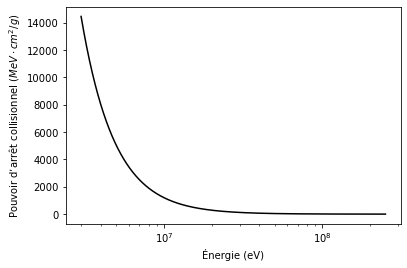

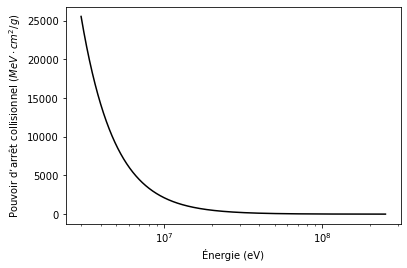

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Definition of known costants
avogadro = 6.022e23 #particle/mol
c = 299792458 #m/s
me = 9.1094E-31*6.242e18 #eV
mp = 1.6727E-27*6.242e18 #eV 
re = 2.8179403227e-15 #m

#Definition of materials (water and compact bone)

#Water
list_atom_H20 = [1, 8] #atomic number of atoms in H20
list_fraction_H20 = [0.11894, 0.888194] #massic fraction of constituents
list_molar_mass_H20_g = [1.0079, 15.999] #g/mol (molar mass in g)
list_molar_mass_H20 = [x / 1000 for x in list_molar_mass_H20_g] #kg/mol (in kg)
rho_water = 1000 #kg/m^3 (density)
I_H20 = 75 #eV 

#Compact bone
list_atom_bone = [1, 6, 7, 8, 12, 15, 16, 20]   
list_fraction_bone = [0.063984, 0.278, 0.027, 0.410016, 0.002, 0.07, 0.002, 0.147]
list_molar_mass_bone_g = [1.007, 12.01, 14.007, 15.999, 24.305, 30.974, 32.06, 40.078] #g/mol
list_molar_mass_bone = [x / 1000 for x in list_molar_mass_bone_g] #kg/mol
rho_bone = 1850 #kg/m^3
I_bone = 91.9 # 

#calculation of electron density of materials
def calc_ne(list_atom_no, list_fraction, list_molar_mass, rho):
    i = 0 
    ne = 0
    for atom_no in list_atom_no:
        nb_electron = atom_no*(list_fraction[i]/list_molar_mass[i])*avogadro
        ne += rho*nb_electron
        i += 1
    return ne

#Calculation of lorentz factor and stopping power of proton in materials
def f(T, ne, I):
    gamma = T/(mp*c**2) + 1
    a = 2*me
    b = 1+(me/mp)**2
    d = me/mp
    U = 2*np.pi*(re**2)*me*(c**2)*ne
    k = (a/I)**2
    return (U*gamma*(gamma*(4*b*gamma+3*d*(gamma**2))-2*(b+d*gamma)*np.log((k*(c**2)*((gamma**2)-1)**2)/(b+d*gamma))))/((((gamma**2)-1)**2)*(b+d*gamma)*(mp*(c**2)))

#Calling the electron density function
ne_H20 = calc_ne(list_atom_H20, list_fraction_H20, list_molar_mass_H20, rho_water)
ne_bone = calc_ne(list_atom_bone, list_fraction_bone, list_molar_mass_bone, rho_bone)

#Plotting
def plot_Scol(ne, I, figname):
    T = np.linspace(3e6,250e6, 1000000)
    Scol = f(T, ne, I)
    
    g = plt.figure()
    plt.plot(T, Scol, "k")
    plt.xscale("log")
    #plt.yscale("log")
    plt.xlabel("Énergie (eV)")
    plt.ylabel(r"Pouvoir d’arrêt collisionnel ($MeV \cdot cm^2 / g$)")
    plt.show()
    g.savefig(figname, dpi = 600, bbox_inches = "tight")
    
#Calling the plotting function
plot_Scol(ne_H20, I_H20, "Scoldt_H20.png")
plot_Scol(ne_bone, I_bone, "Scoldt_bone.png")

plt.show()

## Question 7 ###

Le tableau suivant présente les données de portées obtenues pour les deux algorithmes. L'erreur calculée de manière pratique est indiquée ainsi que l'erreur théorique obtenue à l'aide de l'équation. On constate que l'erreur théorique est plus haute. Cela s'explique par le fait que la méthode de Romberg a été utilisée afin de pouvoir diminuer l'erreur pour un même nombre N de tranches. L'erreur théorique affichée correspond à l'erreur de l'estimé Ri,1. 

<img src="tableau.png">


# Optimisation

## Questions 8, 9, 10 ###

Le code suivant permet de 

trapeze : 359.3 protons/s
simpson : 720.05 protons/s
quad : 728.02 protons/s


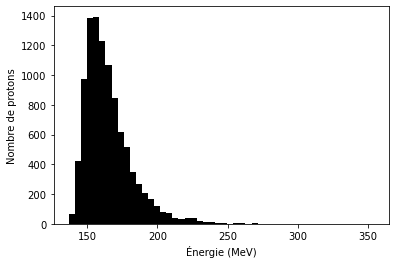

In [11]:
import numpy as np
from scipy.stats import moyal
import matplotlib.pyplot as plt
from scipy import integrate
import timeit

Ti = 150e6
rho_H2O = 1000
rho_bone = 1850
I_H2O = 75 #eV
I_bone = 91.9 #eV
c = 299792458
me = 9.1094E-31*6.242e18 #eV
mp = 1.6727E-27*6.242e18 #eV 
re = 2.8179403227e-15 #m

ne_H2O = 3.385161894888597e+29
ne_bone = 5.906570630843504e+29

energy_list = []

for i in range(10000):
    energy_list += [moyal.rvs(150, 4)]
    
#definition of function
def f(T, ne, I, rho):
    gamma = T/(mp*c**2) + 1
    beta = np.sqrt(1- 1/gamma**2)
    Te_max = (2 * me * c**2 * (gamma**2 - 1)) / (1 + 2 * gamma * (me / mp) + (me / mp)**2)
    Scol = 2*np.pi*(re**2)*me*(c**2)*ne*(1/(beta**2))*(np.log(2*me*(c**2)*(beta**2)*(gamma**2)*Te_max/(I**2))-2*(beta**2))
        
    return rho/Scol

#definition of function's derivative
def f_prime(T, ne, I):
    gamma = T/(mp*c**2) + 1
    a = 2*me
    b = 1+(me/mp)**2
    d = me/mp
    U = 2*np.pi*(re**2)*me*(c**2)*ne
    k = (a/I)**2
    
    return 1/(U*gamma*(gamma*(4*b*gamma+3*d*(gamma**2))-2*(b+d*gamma)*np.log((k*(c**2)*((gamma**2)-1)**2)/(b+d*gamma))))/((((gamma**2)-1)**2)*(b+d*gamma)*(mp*(c**2)))

#function to find if the calculated error is below target precision 
def test_error(Ri, Ri_old, m, target, found):
    err = (1/((4**m)-1))*np.abs(Ri-Ri_old)
    if found == False:
        if err <= Ri*target:
            found = True
            
    return [err, found]

def trapeze(N, a, b, ne, I, rho): 
    h = (b-a)/N
    s = 0.5*f(a, ne, I, rho) + 0.5*f(b, ne, I, rho)
    
    for k in range(1,N):
        s += f(a+k*h, ne, I, rho)

    theo_error = (1/12)*(h**2)*(f_prime(a, ne, I) - f_prime(b, ne, I))
        
    return h*s, theo_error
    
def simpson(N, a, b, ne, I, rho):
    h = (b-a)/N
    s1 = 0.0
    for k in range(1,N,2):
        s1 += f(a+k*h, ne, I, rho)
    s2 = 0.0
    for k in range(2,N,2):
        s2 += f(a+k*h, ne, I, rho)
        
    theo_error = 0 #could be implemented in the future
        
    return (f(a, ne, I, rho)+f(b, ne, I, rho)+4.0*s1+2.0*s2)*h/3.0, theo_error

#Algorithm calculating the integral with trapeze and simpson methods
def algo(Ti, material, N_i, target, int_type):
    #===========================================
    if material == "water":
        ne = ne_H2O
        I = I_H2O
        rho = rho_H2O
        
    elif material == "bone":
        ne = ne_bone
        I = I_bone
        rho = rho_bone
        
    if int_type == "trapeze":
        integral, theo_error = trapeze(N_i, 3e6, Ti, ne, I, rho)
        R = [integral]
        
    elif int_type == "simpson" :
        integral, theo_error = simpson(N_i, 3e6, Ti, ne, I, rho)
        R = [integral]
        
    i = 1
    found = False
    
    while found == False:
        N_i = N_i * 2
        
        if int_type == "trapeze":
            integral, theo_error = trapeze(N_i, 3e6, Ti, ne, I, rho)
            R += [integral]
            
        elif int_type == "simpson" :
            integral, theo_error = simpson(N_i, 3e6, Ti, ne, I, rho)
            R += [integral]
        
        Ri = R[-1]
        Ri_old = R[-1-i]
        error = test_error(Ri, Ri_old, 1, target, found) #calculating error
        found = error[1] #confirming if error < target
        
        
        #loop for calculation of Ri,m integrals (m != 1)
        for m in range(2,i+2):
            
            if found == False:
                Ri = R[-1] #integral Ri,m
                Ri_old = R[-1-i] #integral Ri-1,m
                
                error = test_error(Ri, Ri_old, m, target, found) #calculating error
                found = error[1] #confirming if error < target

                R += [Ri + error[0]] # calculating integral Ri,m+1
        
        i += 1    
    
    return Ri, error[0], theo_error, N_i

#function to evaluate the speed of algorithms
def time_algorithm(int_type, target):
    protons = []
    start_time = timeit.default_timer()
    
    n = 0
    for i in energy_list:
        if int_type == "quad":
            integral, error = integrate.quad(lambda x :f(x, ne_H2O, I_H2O, rho_H2O), 3e6, i*1e6)
            protons += [integral]
        else:
            integral, error, theo_error, Nmax = algo(i*1e6, "water", 1, target, int_type)
            protons += [integral]
        
        end_time = timeit.default_timer()
        n += 1
            
    return protons, (end_time-start_time)
    
scope_list = []

#Calculating speed of algorithms and comparing with scipy.integrate.quad
proton_scope, time = time_algorithm("trapeze", 1e-8)
scope_list += [proton_scope]
proton_per_time = np.round(10000/time, 2)
print("trapeze : " + str(proton_per_time) + " protons/s")

proton_scope, time = time_algorithm("simpson", 1e-8)
scope_list += [proton_scope]
proton_per_time = np.round(10000/time, 2)
print("simpson : " + str(proton_per_time) + " protons/s")

proton_scope, time = time_algorithm("quad", 1e-8)
scope_list += [proton_scope]
proton_per_time = np.round(10000/time, 2)
print("quad : " + str(proton_per_time) + " protons/s")

#histogram of calculated results for the list of energy
plt.hist(scope_list[0], 50, color = "k")
plt.xlabel("Énergie (MeV)")
plt.ylabel("Nombre de protons")
plt.show()

## Question 11###

## Question 12

Le phénomène du pic de Bragg dans l'énergie des protons est utile pour la précision d'irradiation des protons lors de la radiothérapie. En d'autres termes, puisque celle-ci montre que le proton aura un maximum d'énergie à une certaine profondeur, nous pouvons être précis sur l'endroit où l'énergie déposée par le proton est maximale pour irradier des cellules spécifiques comme des cellules cancéreuses.

## Question 13

## Question 14

La protonthérapie est plus pratique pour soigner les mélanomes oculaires parce que, puisqu'on utilise une énergie relativement faible pour les protons, l'énergie déposée par proton est plus localisée et, donc, le rayonnement préserve mieux les tissus environnants comme, entre autres, les nerfs rétiniens qui sont essentiels à la vue.

## Question 15

Le modèle utilisé néglige beaucoup de facteurs réels. En effet, les simulations sont faites en une seule dimension, négligeant les déviations de la trajectoire pouvant être causée par les interactions de Coulomb, même si nous avions négligé leur pouvoir de freinage plus tôt. Implémenter des vecteurs directionnels pourrait rendre le modèle plus réaliste et plus précis sur la position finale du proton. Nous pourrions aussi éventuellement rajouter plus de constantes de plusieurs milieux, puisque le corps humain est constitué d'autres choses que l'eau et les os, afin d'avoir de meilleures données de simulations.

# Références

[1] M. J. Berger, J. S. Coursey, M. A. Zucker, and J. Chang, “ESTAR, PSTAR, and ASTAR :
Computer Programs for Calculating Stopping-Power and Range Tables for Electrons, Protons,
and Helium Ions (version 1.2.3),” tech. rep., Gaithersburg MD, 2005.

[2] M. E. Newman, Computational Physics. CreateSpace, 2013.